# Introduction to Plotting with Seaborn

[Watch a walk-through of this lesson on YouTube](https://youtu.be/851pCwAZWsY)

## Learning Objectives
- Be familiar with the use-cases for Seaborn plots
- Generate a variety of plots in Seaborn useful for EDA
- Understand the advantages and disadvantages of different types of plots in Seaborn
- Recognize and appropriately use strategies for visualizing continuous and categorical data
- Visualize and reason about the distributions of data

---

## Introduction

[Seaborn](https://seaborn.pydata.org) is a great Python plotting package that is built on top of Matplotlib. That is, it uses Matplotlib "under the hood", but it offers the user a much simpler API (set of commands) that enable us to generate a variety of great-looking plots that are particularly useful in data science. You can check out Seaborn's [examples gallery](https://seaborn.pydata.org/examples/index.html) to see some of the cool stuff you can do (including plotting neuroscience data!). Seaborn was written by [Michael Waskom](https://mwaskom.github.io/).

Comparing Seaborn to Matplotlib, you could say that Matplotlib gives you every sharp, hard-to-use tool in the shed, and you have to figure out how to learn them all without chopping off a finger. Fortunately in data science you aren't likely to lose any fingers, but Seaborn gives you some DIY-friendly power tools to get data science jobs done easily and looking great. 




## Overview of Seaborn Plotting Functions

Seaborn is organized into three categories of plot types, as shown below:

<img src=https://seaborn.pydata.org/_images/function_overview_8_0.png  alt='Seaborn overview' width=500>

*Image source: [seaborn.pydata.org](seaborn.pydata.org)*

You can see that Seaborn's functions are organized around the different types of data, and questions we typically ask of data in data science: the `relpolt` function plots relationships between different (continuous) variables; the `displot` function plots distributions of data (such as histograms), and the `catplot` function.


## Importing the Seaborn package

By convention, the alias we use when importing Seaborn is `sns`.

We'll also be using some other packages, so we'll import those packages at the same time.

~~~python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
~~~

In [5]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Plotting Gapminder data

Mostly we'll work with long-format data from here on, but since we have worked with the Gapminder data up until now, let's see how we can generate a plot similar to what we produced in the [Introduction to Plotting with Matplotlib](./plotting) lesson.

First we'll load the Ocieania GDP data, and strip the leading text off column names so that they are just the years:

~~~python
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
df.columns = df.columns.str.strip('gdpPercap_')
~~~

In [6]:
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
df.columns = df.columns.str.strip('gdpPercap_')

df

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


In the previous lesson, we plotted GDP for each country as a function of year. That is, year is on the *x* axis, GDP is on the *y* axis, and there are separate lines for each country. As discussed previously, in this dataset, year is a continuous variable, as is GDP, but country is a categorical variable. 

From the figure of Seaborn plot types above, you can see that `relplot()` is the function to use for relational plots — that is, when you want to show the relationships between two continuous variables (year and GDP in this case).

~~~python
sns.relplot(data=df.T, kind='line')  # For wide-format data we need to transpose rows & columns
plt.show() # Always good practice to have this as the last line in a plotting cell
~~~

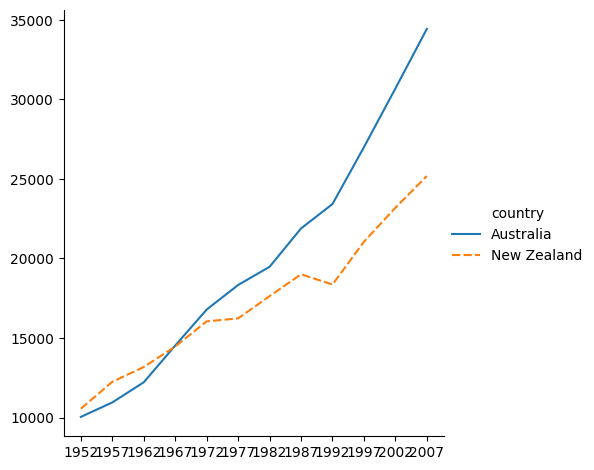

In [7]:
sns.relplot(data=df.T, kind='line')
plt.show()


Compared to plotting the data in Matplotlib (below), the results are similar, but Seaborn adds some aesthetic touches by default, such as reducing the number of irrelevant frame lines, putting the legend outside the plot, and making the line for the second condition dashed (which aids in discriminating lines, especially if there are several of them, or if someone has vision problems). As we'll see, Seaborn isn't just another pretty face — it also makes a wide variety of plots easy to make with a consistent and relatively intuitive syntax.

~~~python
# Matplotlib version of the same plot
df.T.plot()
plt.show()
~~~

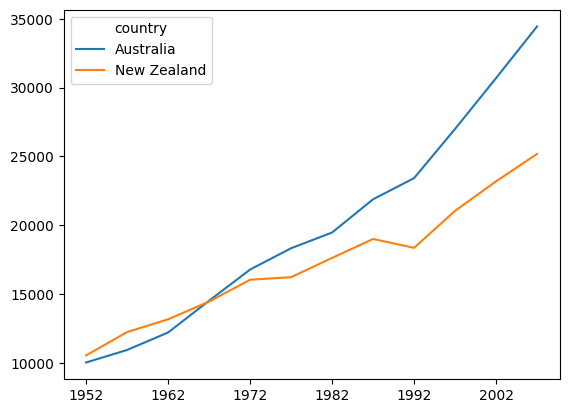

In [8]:
df.T.plot()
plt.show()



### Plotting Long-Format Data

Let's move to working with some data of the sort we might find in cognitive psychology. Imagine a simple **lexical decision task**, an experiment in which each trial involves presenting a printed string of letters to a participant, and asking them to make a response as quickly as possible: pressing one button of the word is a real word in their native language, and another button if it is not a real word. The dependent variable in the experiment is reaction time (RT) — the amount of time that passed between the onset of the word on the screen, and the button press.

Lexical decision tasks are commonly used in psycholinguistics to explore properties of the real words, such as their length or how frequently they occur in normal usage. However, for our simple example, we'll focus on the simpler fact that, on average, people are slower in responding to nonwords than real words (especially if the nonwords look plausibly like real words, for example words like *blorp* or *furtle* that follow English word formation patterns).

We've created some data, using a random number generator, to use in our plotting examples. The data were deliberately created with certain properties, so that the expected difference between RTs. We have data from 5 hypothetical participants, stored in separate data files in the `data` folder. The naming format for the files is `ldt_sXX_data.csv`, where `XX` stands for the subject ID number (two digits).

First we'll load the data from the files, practicing our [list comprehension](../3-python/looping-data-files), and storing the result in a pandas DataFrame called `df`:

~~~python
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/ldt_s??_data.csv')])
~~~

In [9]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/ldt_s??_data.csv')])

we added the ?? to identify unique value within dataset / files
each '?' represents one character

Let's look at a sample of the data:

~~~python
df.sample(10)
~~~

In [10]:
df.sample(10)

,ID,condition,RT
12,ldt_s05,word,0.500721
18,ldt_s02,word,0.486470
25,ldt_s01,nonword,0.767575
27,ldt_s02,nonword,0.605523
28,ldt_s01,nonword,0.855918
32,ldt_s02,nonword,0.738254
25,ldt_s04,nonword,0.560295
47,ldt_s04,nonword,0.848745
29,ldt_s04,nonword,0.924723
30,ldt_s03,nonword,0.701244


We can see that there are three columns:
- `ID` is the unique participant identifier
- `condition` is the type of word (real or nonword)
- `RT` is reaction time, measured in seconds

## Descriptive statistics

We can use the pandas `.describe()` method to examine some basic properties of our data:

~~~python
df.describe()
~~~

In [10]:
df.describe()

,RT
count,250.000000
mean,0.693857
std,0.155706
min,0.290267
25%,0.587107
50%,0.695936
75%,0.801115
max,1.109028


Since `RT` is the only continuous variable in this DataFrame, we only get descriptive statistics for this variable.

## Examining distributions with histograms

**Histograms** are a type of plot that allows us to view distributions of values. The *x* axis of a histogram represents the values in the data, and the *y* axis shows the count of how many trials had that value on the *x* axis. Values on the *x* axis are grouped into *bins* — ranges of values. 

In Seaborn, we use the `displot()` function to plot distributions. Histograms are one type of `displot`, but they are the default, so we can just run the following:

~~~python
sns.displot(data=df, x='RT')
plt.show()
~~~

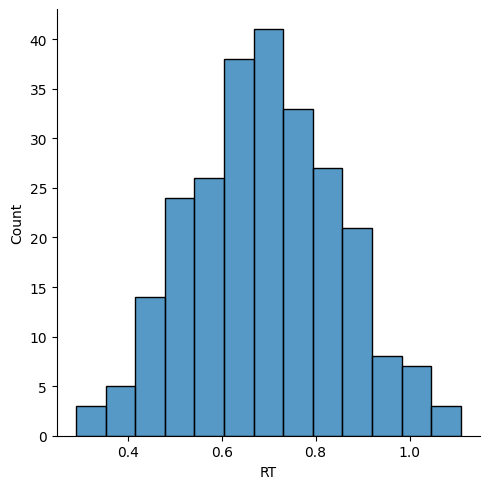

In [11]:
sns.displot(data=df, x='RT')
plt.show()

Comparing the range of values on the *x* axis with the `min` and `max` values from `df.describe()`, we see that the entire range of values is represented. The range of RT values have been binned into 11 categories, in order to draw the 11 bars in the histogram. We can see that the most common values of RT are between approximately 0.5 – 0.6 s, which corresponds to the median (`50%`) value shown by `pd.describe()`. We can also see that the data are slightly *skewed* — there is a wider range of values to the right than the left of the peak. Visualizing distributions is thus a useful way of examining your data, and you can likely glean more information from this plot, more quickly and easily, than from the descriptive statistics table above.

### Tweaking Seaborn plots
We can adjust the parameters of the histogram with a few kwargs, including adjusting *technical* aspects of how the data are treated to create the plot (like the number of bins), and *aesthetic* aspects of how it is represented visually (like the colour).

~~~python
sns.displot(data=df, x='RT',
           bins=25,
           color='red')
plt.show()
~~~

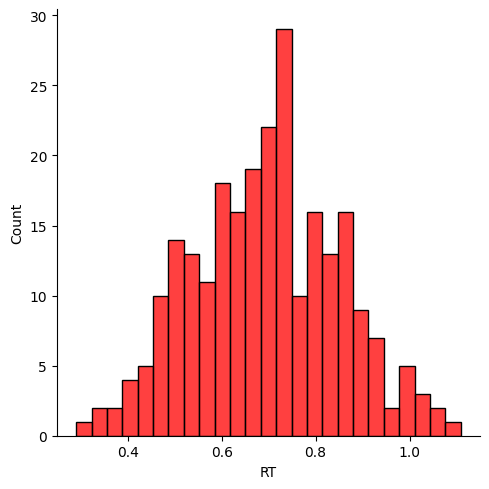

In [15]:
sns.displot(data=df, x='RT', bins=25, color='red')
plt.show()

In the above plot we increased the number of bins from the default to 25. You can see that the histogram looks less  smooth than it did with fewer bins — increasing the number of bins decreases the number of data points in the bins, which in turn results in greater random variability. 

By default (when you don't specify a number of bins), the software makes a decision based on characteristics of the data, which usually results in sensible bin sizes. 

### What to plot on the histogram *y* axis

By default, on the *y* axis Seaborn plots the count of the number of data points in each bin. This isn't always the best measure. It's fine if you just want to look at how values are distributed over the variable on the *x* axis, but if you want to compare histograms, the scale can be deceiving if the total number of data points in different plots is different. For this reason, we can *scale* the data in different ways. 

Particularly useful is to **normalize** the data. For example, you can use `stat='probability'` to make every histograms bar heights sum to 1. This means that the *y* axis now reflects the proportion (percentage) of the data in each bin.  

~~~python
sns.displot(data=df, x='RT',
           stat='probability')
plt.show()
~~~

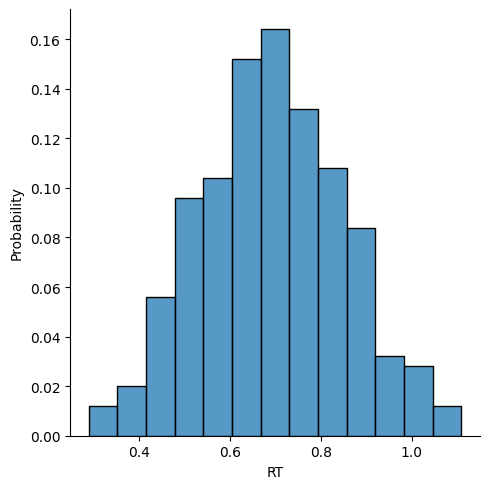

In [18]:
sns.displot(data=df, x= 'RT', stat= 'probability')
plt.show()

### Kernel density estimate

An alternative form of distribution plot in Seaborn is the *kernel density estimate* (`kde`; often more simply called a "density plot"). This is like a histogram, but plots smooth curves over the range of values rather than bins as bars. This is another kind of normalization, but rather than making the heights of the bars sum to 1, the density estimate makes the area under the smoothed curve equal to 1.

Note however that while histograms represent, literally, the number of data points in each bin, the KDEs are *estimates* of the true distribution, and are effectively smoothed and thus slightly less accurate representations of the data you have. On the other hand, KDEs are *models* that predict what the true distirbution would be, if more data was collected. 

In practice, the difference between histograms and KDEs is relatively small in terms of how one might interpret what they show, but this distinction between literal presentations of data and estimates meant to generalize beyond the data is an important concept that cuts through all of data science.

To override the default kind of plot generated by `displot()` (a histogram), we add a `kind` kwarg: 

~~~python
sns.displot(kind='kde',
           data=df, x='RT')
plt.show()
~~~

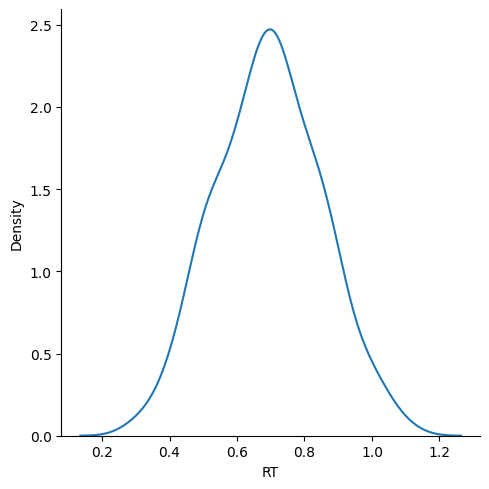

In [19]:
sns.displot(kind= 'kde', data= df, x= 'RT')
plt.show()

Density plots arguably make more sense for continuous variables like reaction time, since they represent continuous variables in a more continuous fashion. 

## Viewing the data by condition

As noted, the experiment had two conditions, words and nonwords. So far we've looked at the data overall, combining RTs from those two conditions. But it's easy to look at the data broken down by condition. 

Firstly, we can use pandas' `.groupby()` method to get descriptive statistics:

~~~python
df.groupby('condition').describe()
~~~

In [20]:
df.groupby('condition').describe()

RT                                                             \
           count      mean       std       min      25%       50%       75%   
condition                                                                     
nonword    125.0  0.791036  0.122998  0.492957  0.70153  0.790963  0.870088   
word       125.0  0.596678  0.120481  0.290267  0.50374  0.599737  0.691626   

                     
                max  
condition            
nonword    1.109028  
word       0.917598

We can add a `hue` kwarg to `sns.displot()` to separate and colour-code the conditions in a histogram:

~~~python
sns.displot(data=df, x='RT', hue='condition')
plt.show()
~~~

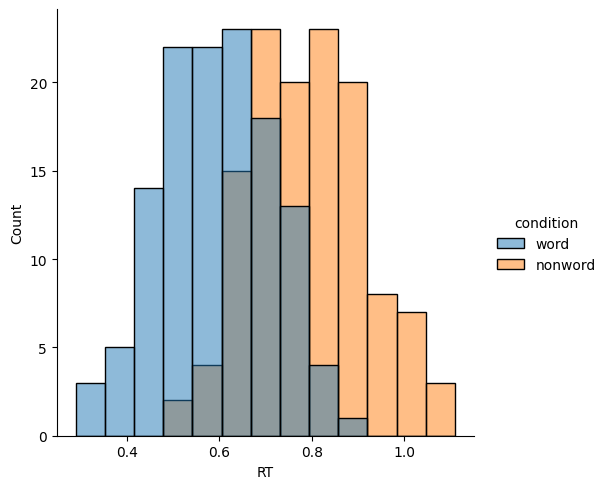

In [21]:
sns.displot(data=df, x='RT', hue='condition')
plt.show()

The grey area in the plot represents overlap.

You can see that Seaborn does lots of nice things to the plot automatically, that make it easy to interpret: there are meaningful labels on both axes, and a legend telling us what each colour represents.

## Colour Choice

Seaborn has a default *palette*, or set of colours, that it uses in sequence. You can see this with:
    sns.color_palette()

~~~python
sns.color_palette()
~~~

In [22]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

So the first category plotted will be blue, the next orange, then green, etc..

Seaborn provides a number of different colour palettes, although the default is a good choice as the hues are designed to be easily distinguished from each other, [even for people with different forms of colour blindness](https://gist.github.com/mwaskom/b35f6ebc2d4b340b4f64a4e28e778486).

One alternative is the `Paired` palette (note the capital `P`), which is designed for when your data are naturally organized in pairs of categories (e.g., imagine if we had the conditions word and nonword, but we wanted to compare these in two different groups, such as native speakers and late learners of a language).

~~~python
sns.color_palette('Paired')
~~~

In [23]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

Let's re-plot our 2-condition histogram with the `Paired` palette:

~~~python
sns.displot(data=df, x='RT', hue='condition', palette='Paired')
plt.show()
~~~

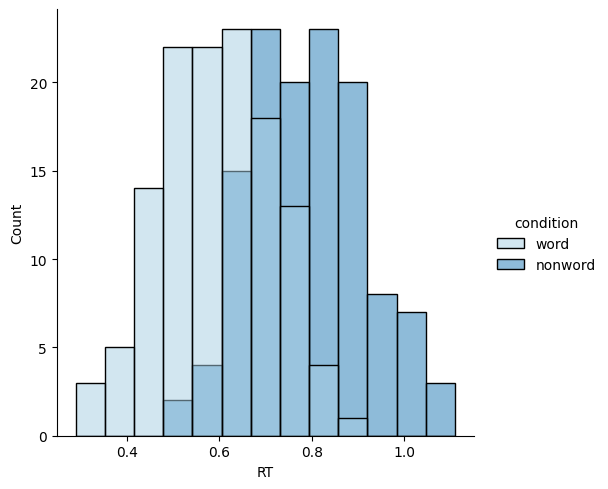

In [25]:
sns.displot(data=df, x='RT', hue='condition', palette='Paired')
plt.show()

Some palettes are better for some things than others, though — for example, in the histogram above, the overlap is not very distinct from the other shades of blue.

We can use the `hue` kwarg with other Seaborn plots as well, like `kde`:

~~~python
sns.displot(kind='kde',
           data=df,
           x='RT', hue='condition', 
           palette='colorblind')
plt.show()
~~~

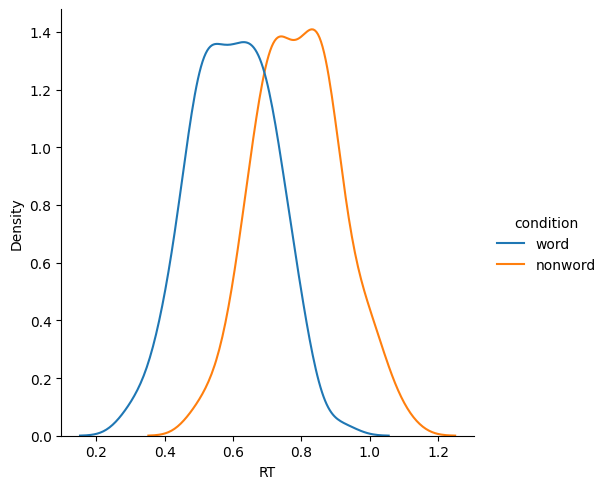

In [ ]:
sns.displot(kind='kde', data=df, x= 'RT', hue= 'condition')
plt.show()

## Categorical Plots 

Histograms and KDEs are used to visualize the distribution of continuous variables, like RT in our example data set.  We can also plot categorical variables, by drawing different histograms/KDEs for each category, like for word vs. nonword in the plots above. These plots are most useful for visualizing the *shape* of the distributions of the data. This is an important first step in working with data, because some ways of treating data (including statistical tests like *t*-tests and ANOVAs) assume that the data are normally distributed, (the classic "bell curve"), and may not work as well or as accurately on data that have very different distributions. On the other hand, in such cases other approaches to analyzing the data could be more appropriate. 

That said, once we understand the distribution of the data, we might want to focus more on assessing whether there are differences between different categories (such as experimental conditions, or groups). This is where Seaborn's `catplot()` family of plots comes into play. 

`sns.catplot()` has 6 different plotting options, as shown in the figure at the top of this lesson. All of them allow us to view the distribution of the data, but in different ways, and often with a focus more on showing the mean, or median. This allows us to more easily compare differences between conditions, while considering the extent to which their distributions overlap or not. We'll show a few of them in this lesson. 

### Box plots

Box plots (sometimes called box-and-whisker plots) are a classic and widely-used approach to comparing between categorical variables. The "box" shows the **interquartile range** (IQR) — the range between the 25th and 75th percentiles of the data. In other words, half of the data falls within this box. The line inside the box represents the **median**, or the value exactly in the middle of all the values in the data set. The whiskers (lines extending out from the box) end at ±1.5 x the IQR (more on that in a minute), and then any points plotted outside the whiskers are considered outliers. The idea behind this is that the whiskers end at what might reasonably be predicted to reflect the minimum and maximum values in the distribution, and any outliers are likely to be inaccurate measurements or other types of "noise". Below is a figure showing how the box plot masks on to the normal distribution, which is a helpful way to think about interpreting box plots.

![](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)

*Image from [Jhguch](https://en.wikipedia.org/wiki/User:Jhguch) and shared under the  [Creative Commons Attribution-Share Alike 2.5 Generic](https://creativecommons.org/licenses/by-sa/2.5/deed.en) license*

### Drawing box plots with Seaborn

We use `sns.catplot()` with the `kind='box'` kwarg:

~~~python
sns.catplot(kind='box',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

We can see from this that the distributions of the two conditions appear quite different, and indeed their IQRs do not overlap at all. This gives us good confidence that RTs are probably different in the two conditions. You can also see that there are a few outliers (the diamonds outside the whiskers). 

Although we lose some of the details of the distribution in going from a histogram to a box plot, we gain some simplicity, and it's easier to assess how different our different conditions are. 


## Violin Plots

A violin plot is in some ways the "best of both worlds", combining a box plot with a KDE. Note that the syntax of this plot is identical to that for the box plot above, except the `kind` kwarg.

~~~python
sns.catplot(kind='violin',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

The box plot has been made more narrow, but the thicker black line inside each "violin" is the IQR, and the thinner lines the whiskers. The coloured, shaded area is the KDE. For aesthetic reasons, the KDE is shown on both sides of the box plot (although if you have different sub-categories, you could plot different distributions on each side). 

In adding the distribution plot to the box plot, you gain detail, but perhaps at the cost of the simplicity of a box plot, and its usefulness in making inferences about differences between conditions. 

<div class="alert alert-block alert-info">
I'll comment for the record that "violin" plot is a terrible name — if the distribution of your data was actually shaped like a violin that would be very suspicious! I prefer Salem Waligura-Newman's name for them, which is "stingray plots". But sadly, once a name is out there, it sticks so you should get used to calling them violin plots. 
</div>

## Strip and Swarm plots

These are quite similar, and both plot the actual individual data points. 


~~~python
sns.catplot(kind='strip',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

Swarm plots shift data points laterally when they are dense, reducing overlap and making it easier to see where the data are more dense.

~~~python
sns.catplot(kind='swarm',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

## Bar plots

These are classic ways of representing data, that focus more on showing and comparing means for different conditions, than on the distribution. The "error bars" (black bars at the top of each bar below) represent 95% confidence intervals, which are a way of representing variance that is better-suited for comparing between means, than for assessing the shape or breadth of the distribution. You can see below that the bar plots lose a lot of the information about the distributions of data, relative to box plots or any of the other plots above. 

Another limitation of bar plots is that they are "anchored" at zero. For some data this makes sense, especially if the data values relative to zero are meaningful. But in many cases — including our current RT data — this doesn't make a lot of sense. An RT of zero would be considered invalid data, since the human nervous system can't execute a response to a stimulus at the speed of light. So our experiment is not really concerned with how much slower than zero a person responded. As well, if your data values are far from zero, and the differences between conditions are relatively small, then bar plots make the differences look meaninglessly small, because the *y* axis has to span the entire range from zero to the maximum value in the plot.

~~~python
sns.catplot(kind='bar',
            data=df, 
            x='condition', y='RT')

plt.show()
~~~

## Point and Line Plots

Point plots generally are a better choice when you want to focus on comparing means between categories, because they simply show the means as points, with 95% confidence intervals. The scale of the plots will be more appropriate, without the visual bias that bar plots create by filling the range from zero to the mean of each condition with a big block of colour.

By default, Seaborn draws lines connecting the points in a plot. This is only really appropriate if your categories are "connected" in some meaningful way, such as different time points (e.g., pre- vs. post-treatment for some intervention), or when you have multiple categorical variables. 

~~~python
sns.catplot(kind='point',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

We can remove the lines with `join=False`, and colour-code the different levels of condition with `hue='condition'`

~~~python
sns.catplot(kind='point', join=False, hue='condition',
           data=df, 
           x='condition', y='RT')

plt.show()
~~~

---

## Summary
- Seaborn makes it easy to generate plots useful for EDA
- `relplot()` is used for visualizing relationships between two continuous variables
- `displot()` is used for visualizing distributions of data, as histograms or kernel density estimates (KDEs)
- `catplot()` is used for making comparisons between different levels of categorical data, such as different experimental conditions or groups
- Different kinds of `catplot()` plots vary in how much they communicate information about the distributions of data in each category, versus on differences between the means of the categories
- In EDA, it's often useful to visualize the data many ways to really understand it. Even still, it's important to have an understanding of the strengths and limitations of different kinds of plots
- Seaborn makes it relatively easy to generate plots and adjust properties such as colour and font size, and as well as making plots accessible to the widest range of viewers